In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


# Metoda najmniejszych kwadratów

Nachylenie (a): 0.5999999999999999
Wyraz wolny (b): 2.200000000000003


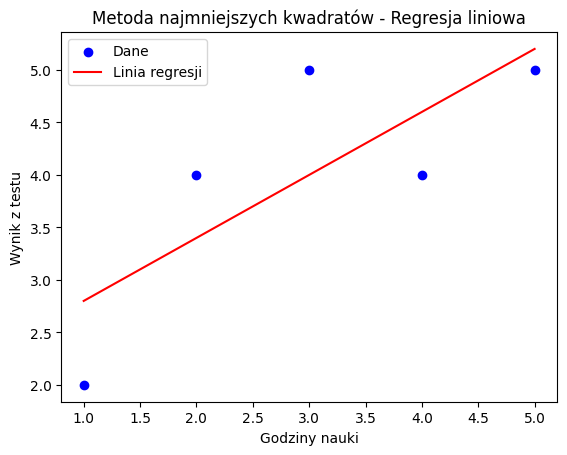

In [2]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [3]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

(np.float64(0.28284271247461895), np.float64(0.9380831519646857))

In [4]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

np.float64(0.7745966692414834)

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


Dopasowane nachylenie (a): 2.46904296738893
Dopasowany wyraz wolny (b): 5.3495605169861955


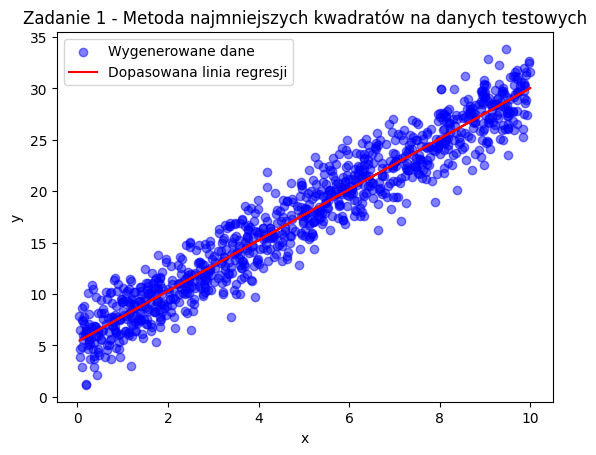

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


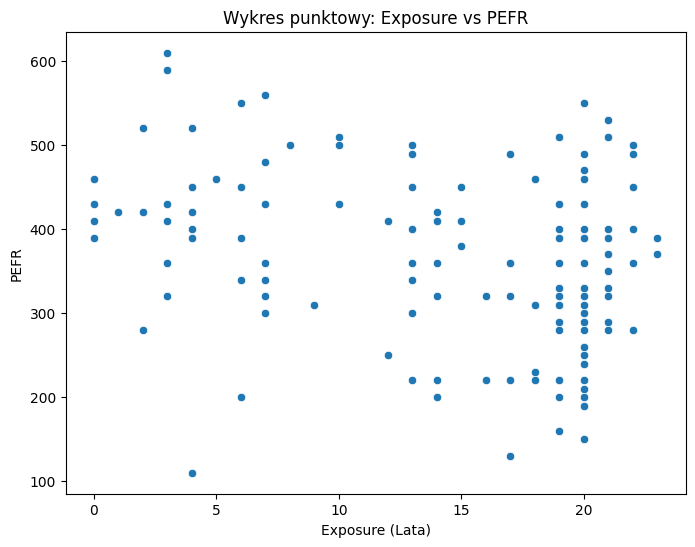

Współczynnik korelacji Pearsona między Exposure a PEFR: -0.2770217010684072
Nachylenie (a): -4.1845764854614425
Wyraz wolny (b): 424.582806573957


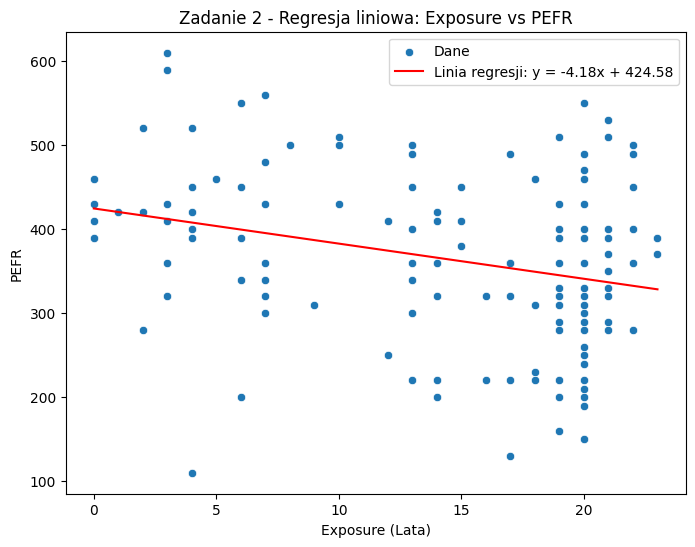

In [6]:
# Zadanie 2

# Wczytaj dane z pliku LungDisease.csv do DataFrame
try:
    lung_df = pd.read_csv('/content/LungDisease.csv')
    display(lung_df.head())

    # Stwórz wykres punktowy
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=lung_df, x='Exposure', y='PEFR')
    plt.xlabel('Exposure (Lata)')
    plt.ylabel('PEFR')
    plt.title('Wykres punktowy: Exposure vs PEFR')
    plt.show()

    # Oblicz współczynnik korelacji Pearsona
    pearson_corr = lung_df['Exposure'].corr(lung_df['PEFR'], method='pearson')
    print(f"Współczynnik korelacji Pearsona między Exposure a PEFR: {pearson_corr}")

    # Dopasuj prostą regresji liniowej
    # Użyjemy stats.linregress, która zwraca m, c, r_value, p_value, std_err
    slope, intercept, r_value, p_value, std_err = stats.linregress(lung_df['Exposure'], lung_df['PEFR'])

    print(f"Nachylenie (a): {slope}")
    print(f"Wyraz wolny (b): {intercept}")

    # Wyświetl wykres z dopasowaną prostą regresji
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=lung_df, x='Exposure', y='PEFR', label='Dane')
    plt.plot(lung_df['Exposure'], slope * lung_df['Exposure'] + intercept, color='red', label=f'Linia regresji: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('Exposure (Lata)')
    plt.ylabel('PEFR')
    plt.title('Zadanie 2 - Regresja liniowa: Exposure vs PEFR')
    plt.legend()
    plt.show()

except FileNotFoundError:
    print("Plik LungDisease.csv nie został znaleziony. Upewnij się, że znajduje się w odpowiedniej lokalizacji.")


# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


Zbiór danych x1, y1:
  Nachylenie (a): 0.5000909090909091, Błąd standardowy nachylenia: 0.11790550059563408
  Wyraz wolny (b): 3.0000909090909103
  Współczynnik korelacji Pearsona: 0.81642051634484
--------------------
Zbiór danych x2, y2:
  Nachylenie (a): 0.5000000000000001, Błąd standardowy nachylenia: 0.11796374596764074
  Wyraz wolny (b): 3.000909090909089
  Współczynnik korelacji Pearsona: 0.8162365060002428
--------------------
Zbiór danych x3, y3:
  Nachylenie (a): 0.4997272727272729, Błąd standardowy nachylenia: 0.11787766222100221
  Wyraz wolny (b): 3.002454545454544
  Współczynnik korelacji Pearsona: 0.8162867394895984
--------------------
Zbiór danych x4, y4:
  Nachylenie (a): 0.4999090909090909, Błąd standardowy nachylenia: 0.11781894172968553
  Wyraz wolny (b): 3.0017272727272726
  Współczynnik korelacji Pearsona: 0.8165214368885028
--------------------


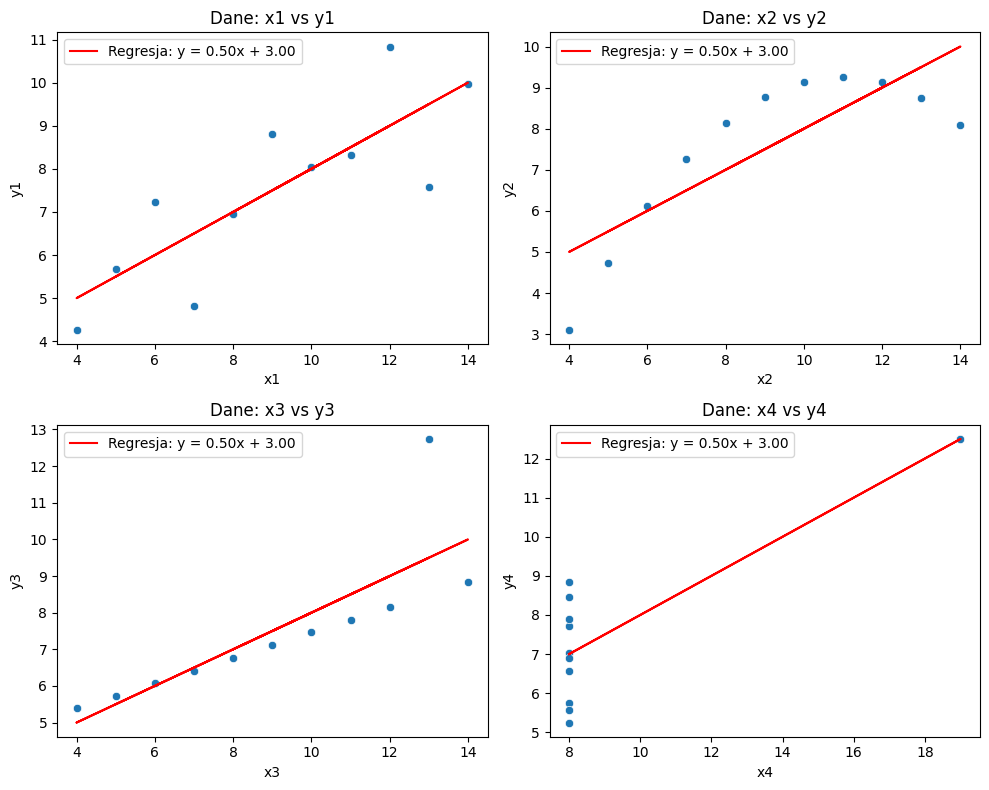

In [8]:
# Zadanie 3

# 1. Wczytaj dane
try:
    # Wczytaj dane z pliku anscombe.csv do DataFrame, pomijając pierwsze dwa wiersze i nadając nazwy kolumn
    anscombe_df = pd.read_csv('/content/anscombe.csv', skiprows=2, header=None)
    anscombe_df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
    display(anscombe_df.head())

    # 2. Stwórz wykresy punktowe i dopasuj funkcje liniowe
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten() # Spłaszcz tablicę axes, aby łatwiej iterować

    datasets = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

    for i, (x_col, y_col) in enumerate(datasets):
        ax = axes[i]

        # Stwórz wykres punktowy
        sns.scatterplot(data=anscombe_df, x=x_col, y=y_col, ax=ax)

        # Dopasuj funkcję liniową (użyjemy stats.linregress)
        slope, intercept, r_value, p_value, std_err = stats.linregress(anscombe_df[x_col], anscombe_df[y_col])

        # Rysuj dopasowaną prostą regresji
        ax.plot(anscombe_df[x_col], slope * anscombe_df[x_col] + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')

        # Ustaw tytuł wykresu
        ax.set_title(f'Dane: {x_col} vs {y_col}')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.legend()

        # 4. Oblicz współczynnik korelacji Pearsona
        pearson_corr = anscombe_df[x_col].corr(anscombe_df[y_col], method='pearson')
        print(f"Zbiór danych {x_col}, {y_col}:")
        print(f"  Nachylenie (a): {slope}, Błąd standardowy nachylenia: {std_err}")
        print(f"  Wyraz wolny (b): {intercept}")
        print(f"  Współczynnik korelacji Pearsona: {pearson_corr}")
        print("-" * 20)

    plt.tight_layout() # Zapobiega nakładaniu się wykresów
    plt.show()

except FileNotFoundError:
    print("Plik anscombe.csv nie został znaleziony. Upewnij się, że znajduje się w odpowiedniej lokalizacji.")
except Exception as e:
    print(f"Wystąpił błąd: {e}")